<a href="https://colab.research.google.com/github/ImanAyaz10/waste-classification-project-SA-AI/blob/main/waste_classification_week4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print("Folders in MyDrive:", os.listdir("/content/drive/MyDrive"))


Folders in MyDrive: ['Colab Notebooks', 'IMG-20250222-WA0046.jpg', 'IMAN AYAZ 2225165109.png', 'Classroom', 'Iman Ayaz.gdoc', 'Untitled document (3).gdoc', 'logo .docx', 'Screenshot_20240710-211711.jpg', 'IMG-20240815-WA0010.jpg', 'GAME 1.mp4', 'Untitled document (2).gdoc', 'Untitled document.pdf', 'Untitled document (1).gdoc', '1- 30-60 second introduction pitch preparing.gdoc', 'IMG-20250520-WA0052 (1).jpg', 'IMG-20250520-WA0052.jpg', 'IMG-20250520-WA0053.jpg', 'IMG_20250520_234344_733.webp', 'Untitled document.gdoc', 'IMG_20250805_152907_599.jpg', 'IMG_20250805_152952_825.jpg', 'IMG_20250805_153531_849.jpg', 'IMG_20250805_153705_164.jpg', 'IMG_20250805_153851_281.jpg', 'IMG-20250805-WA0012.jpg', 'IMG-20250805-WA0013.jpg', 'IMG-20250805-WA0014.jpg', 'IMG-20250805-WA0015.jpg', 'IMG-20250805-WA0016.jpg', 'IMG_20250805_155105_579.jpg', '📘 Data Science - AI (Practical, Project-Oriented Course).gdoc', 'datasets', 'LawBridge_FYP_Proposal.docx', 'RESUME-IA-SE-1.pdf']


In [ ]:
print(os.listdir("/content/drive/MyDrive/datasets/DATASET/DATASET"))
print(os.listdir("/content/drive/MyDrive/datasets/DATASET/DATASET/TRAIN"))

print(os.listdir("/content/drive/MyDrive/datasets/DATASET/DATASET/TEST"))



['TEST', 'TRAIN']
['O', 'R']
['O', 'R']


week 4 – Image Statistics & Correlation

In [ ]:

import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Dataset Path
processed_dir = "/content/drive/MyDrive/datasets/DATASET/DATASET/TRAIN"

# Feature Extraction
rows = []
for cls in sorted(os.listdir(processed_dir)):
    cls_path = os.path.join(processed_dir, cls)
    files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg','.jpeg','.png'))]
    for f in files:
        fp = os.path.join(cls_path, f)
        try:
            with Image.open(fp) as im:
                im = im.convert('RGB')
                w,h = im.size
                arr = np.array(im)/255.0
                gray = 0.2989*arr[:,:,0] + 0.5870*arr[:,:,1] + 0.1140*arr[:,:,2]
                brightness = float(np.mean(gray))
                mean_r = float(np.mean(arr[:,:,0]))
                mean_g = float(np.mean(arr[:,:,1]))
                mean_b = float(np.mean(arr[:,:,2]))
                aspect = float(w)/float(h) if h!=0 else 0
                rows.append({
                    "filename": fp,
                    "class": cls,
                    "width": w,
                    "height": h,
                    "aspect_ratio": aspect,
                    "brightness": brightness,
                    "mean_r": mean_r,
                    "mean_g": mean_g,
                    "mean_b": mean_b
                })
        except:
            pass

df_stats = pd.DataFrame(rows)
print("✅ Total images analysed:", len(df_stats))
df_stats.head()


✅ Total images analysed: 22564


,filename,class,width,height,aspect_ratio,brightness,mean_r,mean_g,mean_b
0,/content/drive/MyDrive/datasets/DATASET/DATASE...,O,210,230,0.913043,0.761675,0.822000,0.737735,0.727447
1,/content/drive/MyDrive/datasets/DATASET/DATASE...,O,275,183,1.502732,0.818055,0.876004,0.808406,0.716515
2,/content/drive/MyDrive/datasets/DATASET/DATASE...,O,259,194,1.335052,0.403801,0.438164,0.398493,0.341396
3,/content/drive/MyDrive/datasets/DATASET/DATASE...,O,275,183,1.502732,0.396284,0.452988,0.377511,0.344624
4,/content/drive/MyDrive/datasets/DATASET/DATASE...,O,275,183,1.502732,0.876917,0.907042,0.868131,0.843945


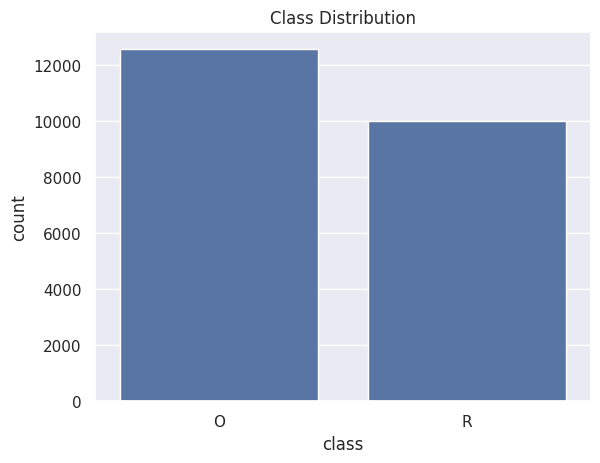

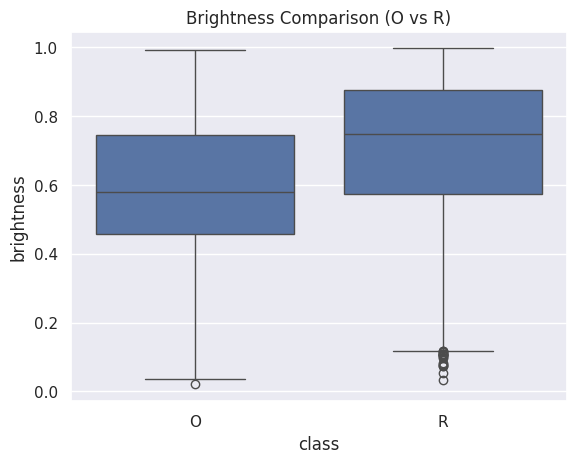

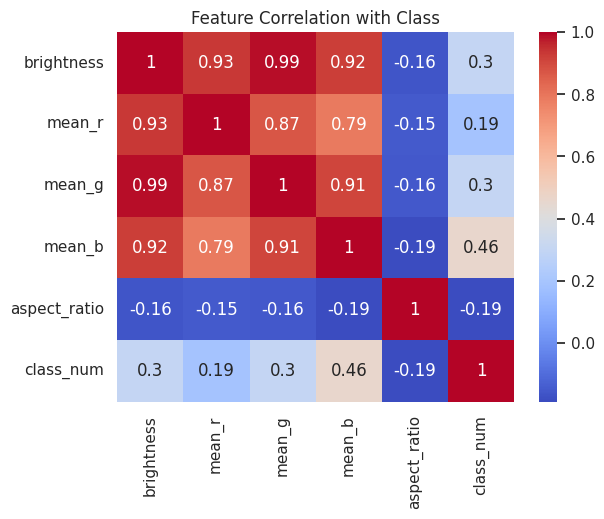

In [ ]:
# Class counts
sns.countplot(x='class', data=df_stats)
plt.title("Class Distribution")
plt.show()

# Brightness by class
sns.boxplot(x='class', y='brightness', data=df_stats)
plt.title("Brightness Comparison (O vs R)")
plt.show()

# Correlation heatmap
df_stats['class_num'] = df_stats['class'].map({'O':0, 'R':1})
corr = df_stats[['brightness','mean_r','mean_g','mean_b','aspect_ratio','class_num']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Class")
plt.show()


"WEEK 5 – Simple CNN Model"


In [7]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
565/565 ━━━━━━━━━━━━━━━━━━━━ 1355s 2s/step - accuracy: 0.7726 - loss: 0.4933 - val_accuracy: 0.7974 - val_loss: 0.4208
Epoch 2/3
565/565 ━━━━━━━━━━━━━━━━━━━━ 1198s 2s/step - accuracy: 0.8291 - loss: 0.3992 - val_accuracy: 0.8074 - val_loss: 0.4243
Epoch 3/3
565/565 ━━━━━━━━━━━━━━━━━━━━ 1191s 2s/step - accuracy: 0.8434 - loss: 0.3721 - val_accuracy: 0.8460 - val_loss: 0.3588


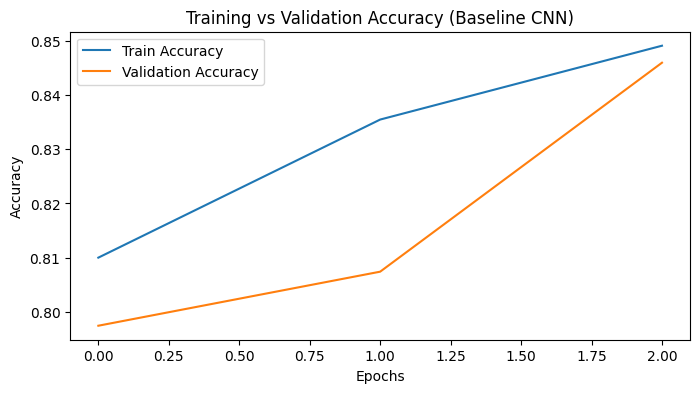

✅ Model saved as waste_cnn_model.h5


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Path Setup
train_dir = "/content/drive/MyDrive/datasets/DATASET/DATASET/TRAIN"
test_dir  = "/content/drive/MyDrive/datasets/DATASET/DATASET/TEST"

# : Data Generator (with augmentation)
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(150,150),   # smaller image = faster training
    batch_size=32,
    subset='training',
    class_mode='binary'
)

val_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)


model = models.Sequential([
    layers.Input(shape=(150,150,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3,         # start small (3–5 recommended)
    verbose=1
)


plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy (Baseline CNN)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model.save("/content/waste_cnn_model.h5")
print("✅ Model saved as waste_cnn_model.h5")


"WEEK 6 — Transfer Learning (MobileNetV2)"

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


/tmp/ipython-input-450667266.py:17: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(150,150,3),
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
565/565 ━━━━━━━━━━━━━━━━━━━━ 548s 958ms/step - accuracy: 0.8850 - loss: 0.2690 - val_accuracy: 0.9275 - val_loss: 0.1802
Epoch 2/3
565/565 ━━━━━━━━━━━━━━━━━━━━ 533s 944ms/step - accuracy: 0.9433 - loss: 0.1468 - val_accuracy: 0.9191 - val_loss: 0.1994
Epoch 3/3
565/565 ━━━━━━━━━━━━━━━━━━━━ 532s 942ms/step - accuracy: 0.9572 - loss: 0.1136 - val_accuracy: 0.9315 - val_loss: 0.1818


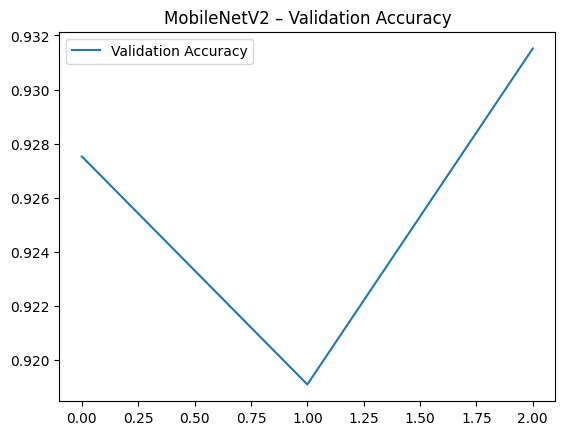

✅ Transfer Learning Model Saved!


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = "/content/drive/MyDrive/datasets/DATASET/DATASET/TRAIN"
test_dir  = "/content/drive/MyDrive/datasets/DATASET/DATASET/TEST"

train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = train_gen.flow_from_directory(train_dir, target_size=(150,150),
                                           batch_size=32, subset='training',
                                           class_mode='binary')
val_data = train_gen.flow_from_directory(train_dir, target_size=(150,150),
                                         batch_size=32, subset='validation',
                                         class_mode='binary')

base_model = tf.keras.applications.MobileNetV2(input_shape=(150,150,3),
                                               include_top=False, weights='imagenet')
base_model.trainable = False

model_tl = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_tl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_tl = model_tl.fit(train_data, validation_data=val_data, epochs=3)

plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title("MobileNetV2 – Validation Accuracy")
plt.legend(); plt.show()

model_tl.save("/content/waste_transfer_model.h5")
print("✅ Transfer Learning Model Saved!")


"WEEK 7 — Model Evaluation"

Found 2513 images belonging to 2 classes.
79/79 ━━━━━━━━━━━━━━━━━━━━ 442s 6s/step
              precision    recall  f1-score   support

     Organic       0.86      0.96      0.91      1401
  Recyclable       0.94      0.80      0.86      1112

    accuracy                           0.89      2513
   macro avg       0.90      0.88      0.89      2513
weighted avg       0.90      0.89      0.89      2513



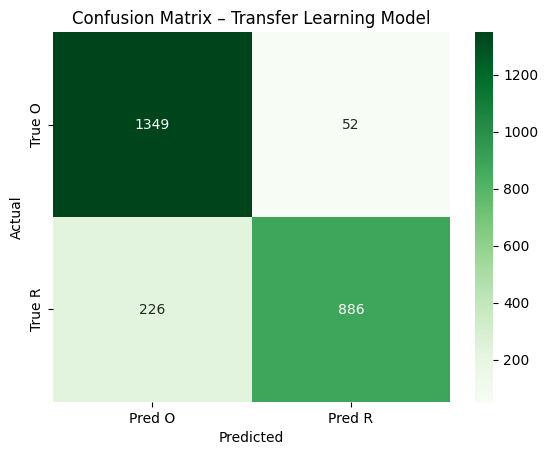

In [3]:
#
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

#  Prepare test data
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(
    test_dir, target_size=(150,150), batch_size=32,
    class_mode='binary', shuffle=False
)

#  Predict
preds = model_tl.predict(test_data)
y_pred = (preds > 0.5).astype(int)
y_true = test_data.classes

#  Metrics report
print(classification_report(y_true, y_pred, target_names=['Organic','Recyclable']))

#  Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred O','Pred R'],
            yticklabels=['True O','True R'])
plt.title("Confusion Matrix – Transfer Learning Model")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()
